In [1]:
import pygmt

# Set paths for the input files
datafile = "./Example_Station_Lat_Lon_Ver00.txt"
cptfile = "./Topo_Hyxiao_Ver01.cpt"

# Set the output file name
# I used pdf format here because it could later modified in Illustrator
output = "Example_Station_Map.pdf"

# Automatically determine the region range based on the data file
region = "-94/-83/34/43"

# Define the projection (adjust as needed)
projection = "M6i"


In [2]:
# Lets take a look at the example location 
%cat ./Example_Station_Lat_Lon_Ver00.txt

-87.9546 35.2511
-86.9333 35.1386
-86.2645 35.1194


In [3]:
# Lets take a look at the example color palattee
%cat ./Topo_Hyxiao_Ver01.cpt

# Color table for topography, via cpt-city
# Designed by: Thomas Dewez for printing
#
# COLOR_MODEL = RGB
  0	51	102	0	 175	129	195	31
175	129	195	31	 350	255	255	204
350	255	255	204	 400	244	189	69
400	244	189	69  	 500	102	51	12
500	102	51	12	 600	102	51	0
B	51	102	0
F	120	51	0
N	51	102	0


In [7]:

# Read the datafile and extract longitude and latitude from each line
lon=[]
lat=[]

with open(datafile, "r") as f:
    for line in f:
        if line.strip():  # Check if the line is not empty
            # Split the line by whitespace and extract longitude and latitude
            values = line.split()
            lon.append(float(values[0]))  # Longitude is the first value
            lat.append(float(values[1]))  # Latitude is the second value

In [8]:
# This is low resolution basemap
#grid = pygmt.datasets.load_earth_relief(resolution="01m", region=[-94, -83, 34, 43])

# This is higher
#grid = pygmt.datasets.load_earth_relief(resolution="15s", region=[-94, -83, 34, 43])

# This is even higher
grid = pygmt.datasets.load_earth_relief(resolution="03s", region=[-94, -83, 34, 43])

grdblend [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]
grdblend [NOTICE]: Earth Relief at 3x3 arc seconds tiles provided by SRTMGL3 (land only) [NASA/USGS].
grdblend [NOTICE]:   -> Download 1x1 degree grid tile (earth_relief_03s_g): N34W094


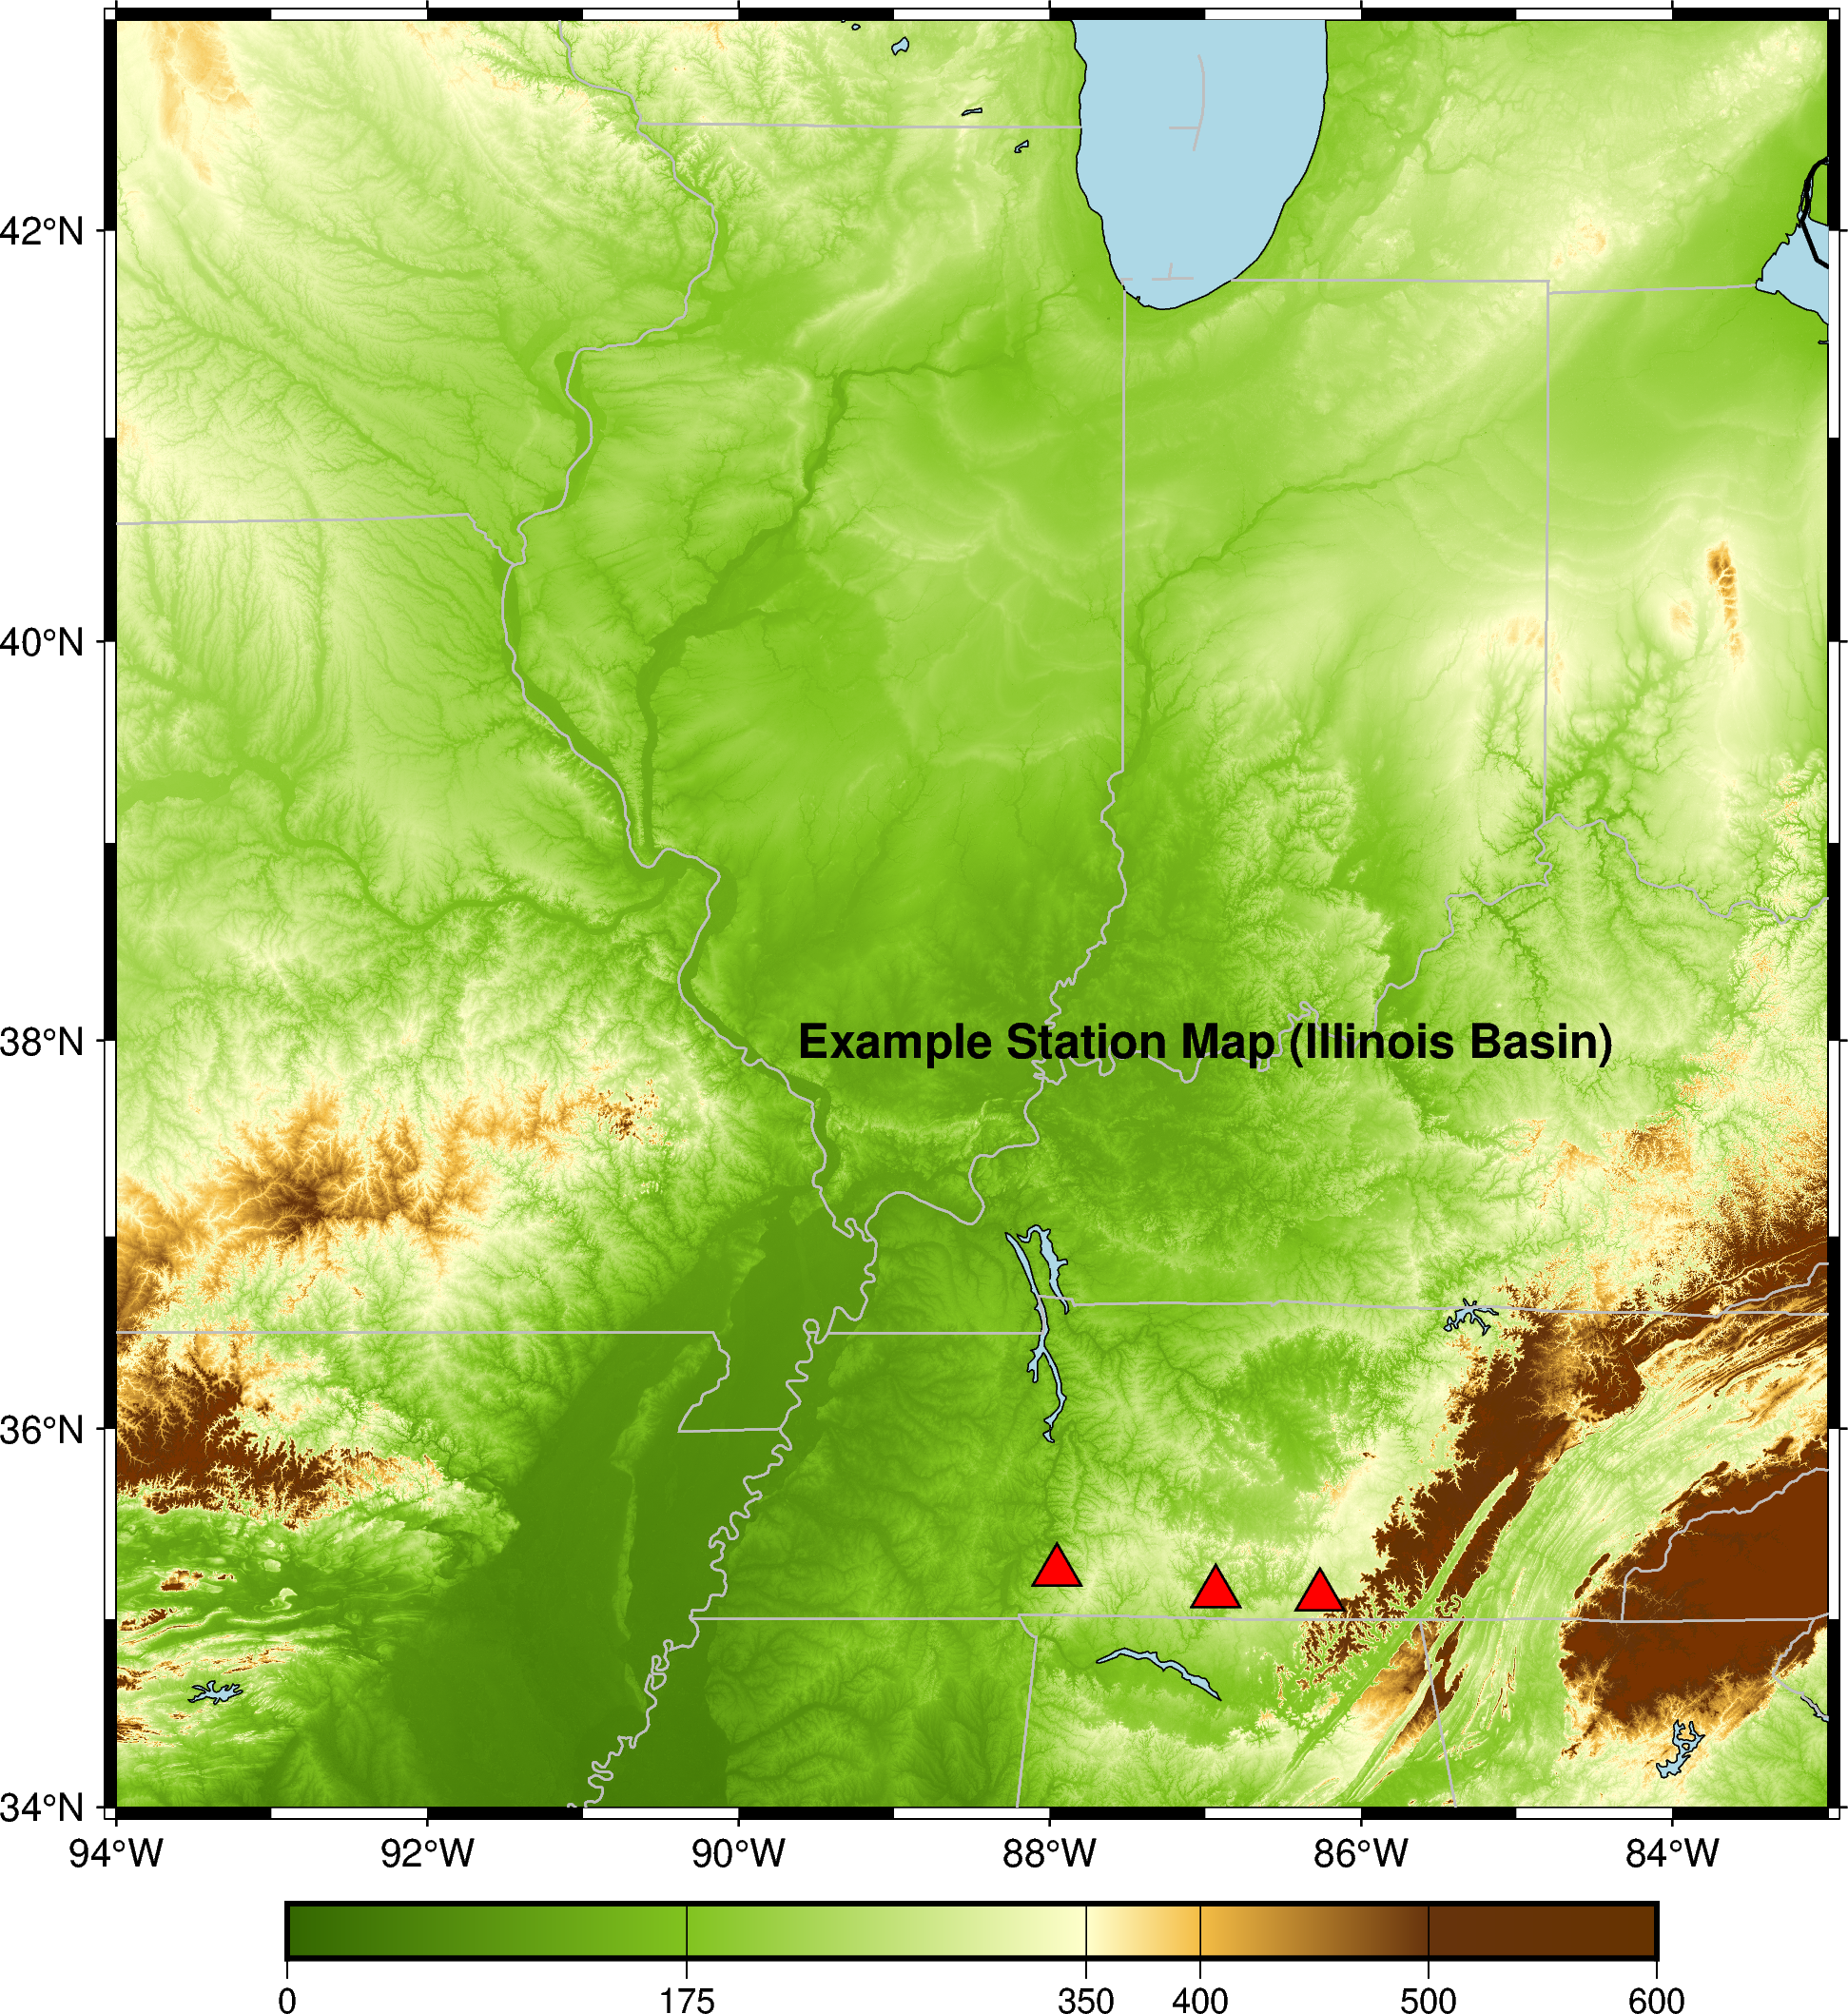

In [9]:
# Create the plain basemap with the specified region and projection
fig = pygmt.Figure()
fig.grdimage(grid=grid, projection=projection, cmap=cptfile )
fig.basemap(region=region, projection=projection, frame=True)

# Plot the station locations
fig.plot(
    x=lon,
    y=lat,
    style="t0.5c",
    fill="red",
    pen="0.5p,black",
)

# Country boundary and water body/lakes
fig.coast(
    shorelines=True,
    lakes=True,
    water="lightblue",
    borders="1/1p,black",
)

# State Boundary
fig.coast(
    borders="2/0.5p,gray",
)

fig.coast(
    borders="3/1p",
)

# Add a title to the map
fig.text(
    text="Example Station Map (Illinois Basin)",
    x=-87,
    y=38,
    justify="CM",
    font="12p,Helvetica-Bold",
)

# Add a color bar to the map
fig.colorbar(
    cmap=cptfile,
)

# Save the plot
fig.savefig(output)

# Show the plot
fig.show()
